# Uso de los Parámetros de Calibración
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/2-Percepcion/2-3-Uso-Parametros.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

Cargar los parámetros intrínsecos de la cámara almacenados en un archivo.

In [2]:
colab = True
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/2-Percepcion/camera_params.p

In [3]:
params = pickle.load(open('camera_params.p', 'rb'))
params['M']
params['coefs_dist']

# Visualización de los parámetros
print("Matriz de calibración:"); print(np.round(params['M'],3))
print("\nCoeficientes de distorsión:"); print(np.round(params['coefs_dist'],3))

Matriz de calibración:
[[174.787   0.    203.069]
 [  0.    175.15  155.516]
 [  0.      0.      1.   ]]

Coeficientes de distorsión:
[[-0.232  0.061 -0.     0.    -0.007]]


Aplicar los parámetros para quitar la distorsión a una imagen de prueba

In [4]:
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/2-Percepcion/imagenes/img_prueba.png

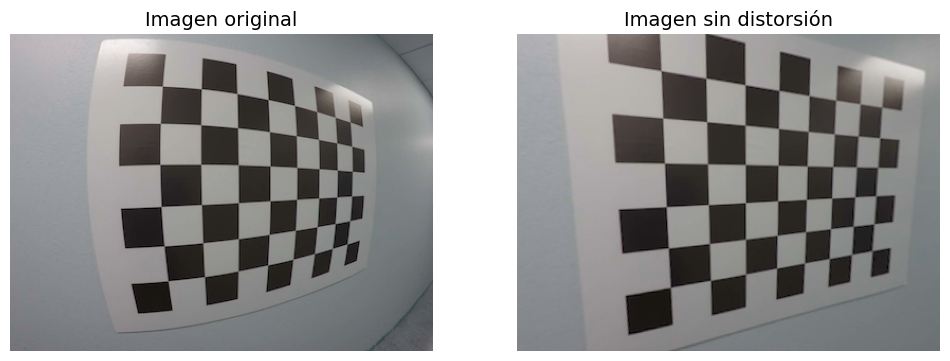

In [11]:
# Imagen de entrada
Iorig = cv2.imread('img_prueba.png')

# Corregir la distorsión
Iundist = cv2.undistort(Iorig, params['M'], params['coefs_dist'], None)

# Visualizar las imágenes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.imshow(Iorig)
ax1.set_title('Imagen original', fontsize=14); ax1.axis('off')
ax2.imshow(Iundist)
ax2.set_title('Imagen sin distorsión', fontsize=14); ax2.axis('off');